In [ ]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# ignore warnings
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle # to save the model 

In [5]:
# load and read the csv file
df = pd.read_csv('data/mushrooms.csv')
df.sample(5)

FileNotFoundError: [Errno 2] No such file or directory: 'data/mushrooms.csv'

In [ ]:
print("Shape of the dataset:", df.shape)

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.info()

In [3]:
mushroom_map = {
    'class' : {'e':'edible', 'p' :'poisonous'},
    'cap-shape' : {'b':'bell','c':'conical','x':'convex','f':'flat', 'k':'knobbed','s':'sunken'},
    'cap-surface' : {'f':'fibrous','g':'grooves','y':'scaly','s':'smooth'},
    'cap-color' : {'n':'brown','b':'buff','c':'cinnamon','g':'gray','r':'green','p':'pink','u':'purple','e':'red','w':'white','y':'yellow'},
    'bruises' : {'t':'bruises','f':'no'},
    'odor' : {'a':'almond','l':'anise','c':'creosote','y':'fishy','f':'foul','m':'musty','n':'none','p':'pungent','s':'spicy'},
    'gill-attachment' : {'a':'attached','d':'descending','f':'free','n':'notched'},
    'gill-spacing' : {'c':'close','w':'crowded','d':'distant'},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", 
                   "u": "purple", "e": "red", "w": "white", "y": "yellow" },
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate","r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
}

In [4]:
# copying the original dataset into a variable
data = df.copy()
data = data.replace(mushroom_map)
data.sample(5)

NameError: name 'df' is not defined

In [9]:
data.describe().transpose()

,count,unique,top,freq
class,8124,2,edible,4208
cap-shape,8124,6,convex,3656
cap-surface,8124,4,scaly,3244
cap-color,8124,10,brown,2284
bruises,8124,2,no,4748
odor,8124,9,none,3528
gill-attachment,8124,2,free,7914
gill-spacing,8124,2,close,6812
gill-size,8124,2,broad,5612
gill-color,8124,12,buff,1728


# Data Visualization

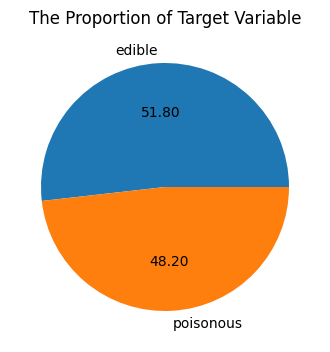

In [10]:
# Distribution of target feature

labels = data['class'].value_counts().index
plt.figure(figsize=(4,5))
plt.pie(df['class'].value_counts(), labels = labels, autopct='%.2f')
plt.title("The Proportion of Target Variable")
plt.show()

- We can see that the dataset has almost balanced target feature.

In [11]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [12]:
def crosstab_feature(df, feature, target='class'):
    return pd.crosstab(df[feature], df[target],  normalize='index')

<Figure size 800x700 with 0 Axes>

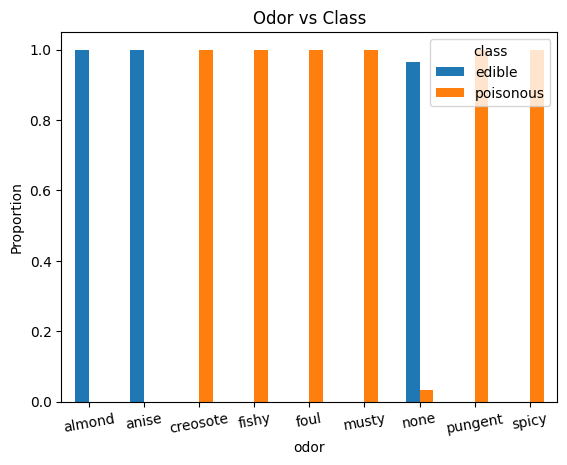

In [13]:
ct = crosstab_feature(data, 'odor')
plt.figure(figsize=(8,7))
ct.plot(kind='bar')
plt.ylabel('Proportion')
plt.title('Odor vs Class')
plt.xticks(rotation=10)
plt.show()

- Chi-Square Test ---> is a statistical test used to determine if there is a significant relationship between two categorical variables.
- If p-value < 0.05, then a strong relationship with the target feature.
- Elif p-value >= 0.05, then a weak or no relationship with the target feature.

In [33]:
def chi_square_test(df, feature, target='class'):
    if feature == target:
        return None
    else:
        ct = pd.crosstab(df[feature], df[target])
        chi2, p, _, _ = chi2_contingency(ct)
        return p

for feature in df.columns:
    p_val = chi_square_test(data, feature)
    if p_val is not None:
        print(f"{feature}--------> {p_val:.4f}")

cap-shape--------> 0.0000
cap-surface--------> 0.0000
cap-color--------> 0.0000
bruises--------> 0.0000
odor--------> 0.0000
gill-attachment--------> 0.0000
gill-spacing--------> 0.0000
gill-size--------> 0.0000
gill-color--------> 0.0000
stalk-shape--------> 0.0000
stalk-root--------> 0.0000
stalk-surface-above-ring--------> 0.0000
stalk-surface-below-ring--------> 0.0000
stalk-color-above-ring--------> 0.0000
stalk-color-below-ring--------> 0.0000
veil-type--------> 1.0000
veil-color--------> 0.0000
ring-number--------> 0.0000
ring-type--------> 0.0000
spore-print-color--------> 0.0000
population--------> 0.0000
habitat--------> 0.0000


- p-value == 0 -> there is a significant relationship with the target variable.
- p-value == 1 -> no relationship with the target variable.
- So, removing the 'veil-type' features and keeping the rest all.

In [34]:
data.drop(columns=['veil-type'], axis=1, inplace=True)
data.shape

(8124, 22)

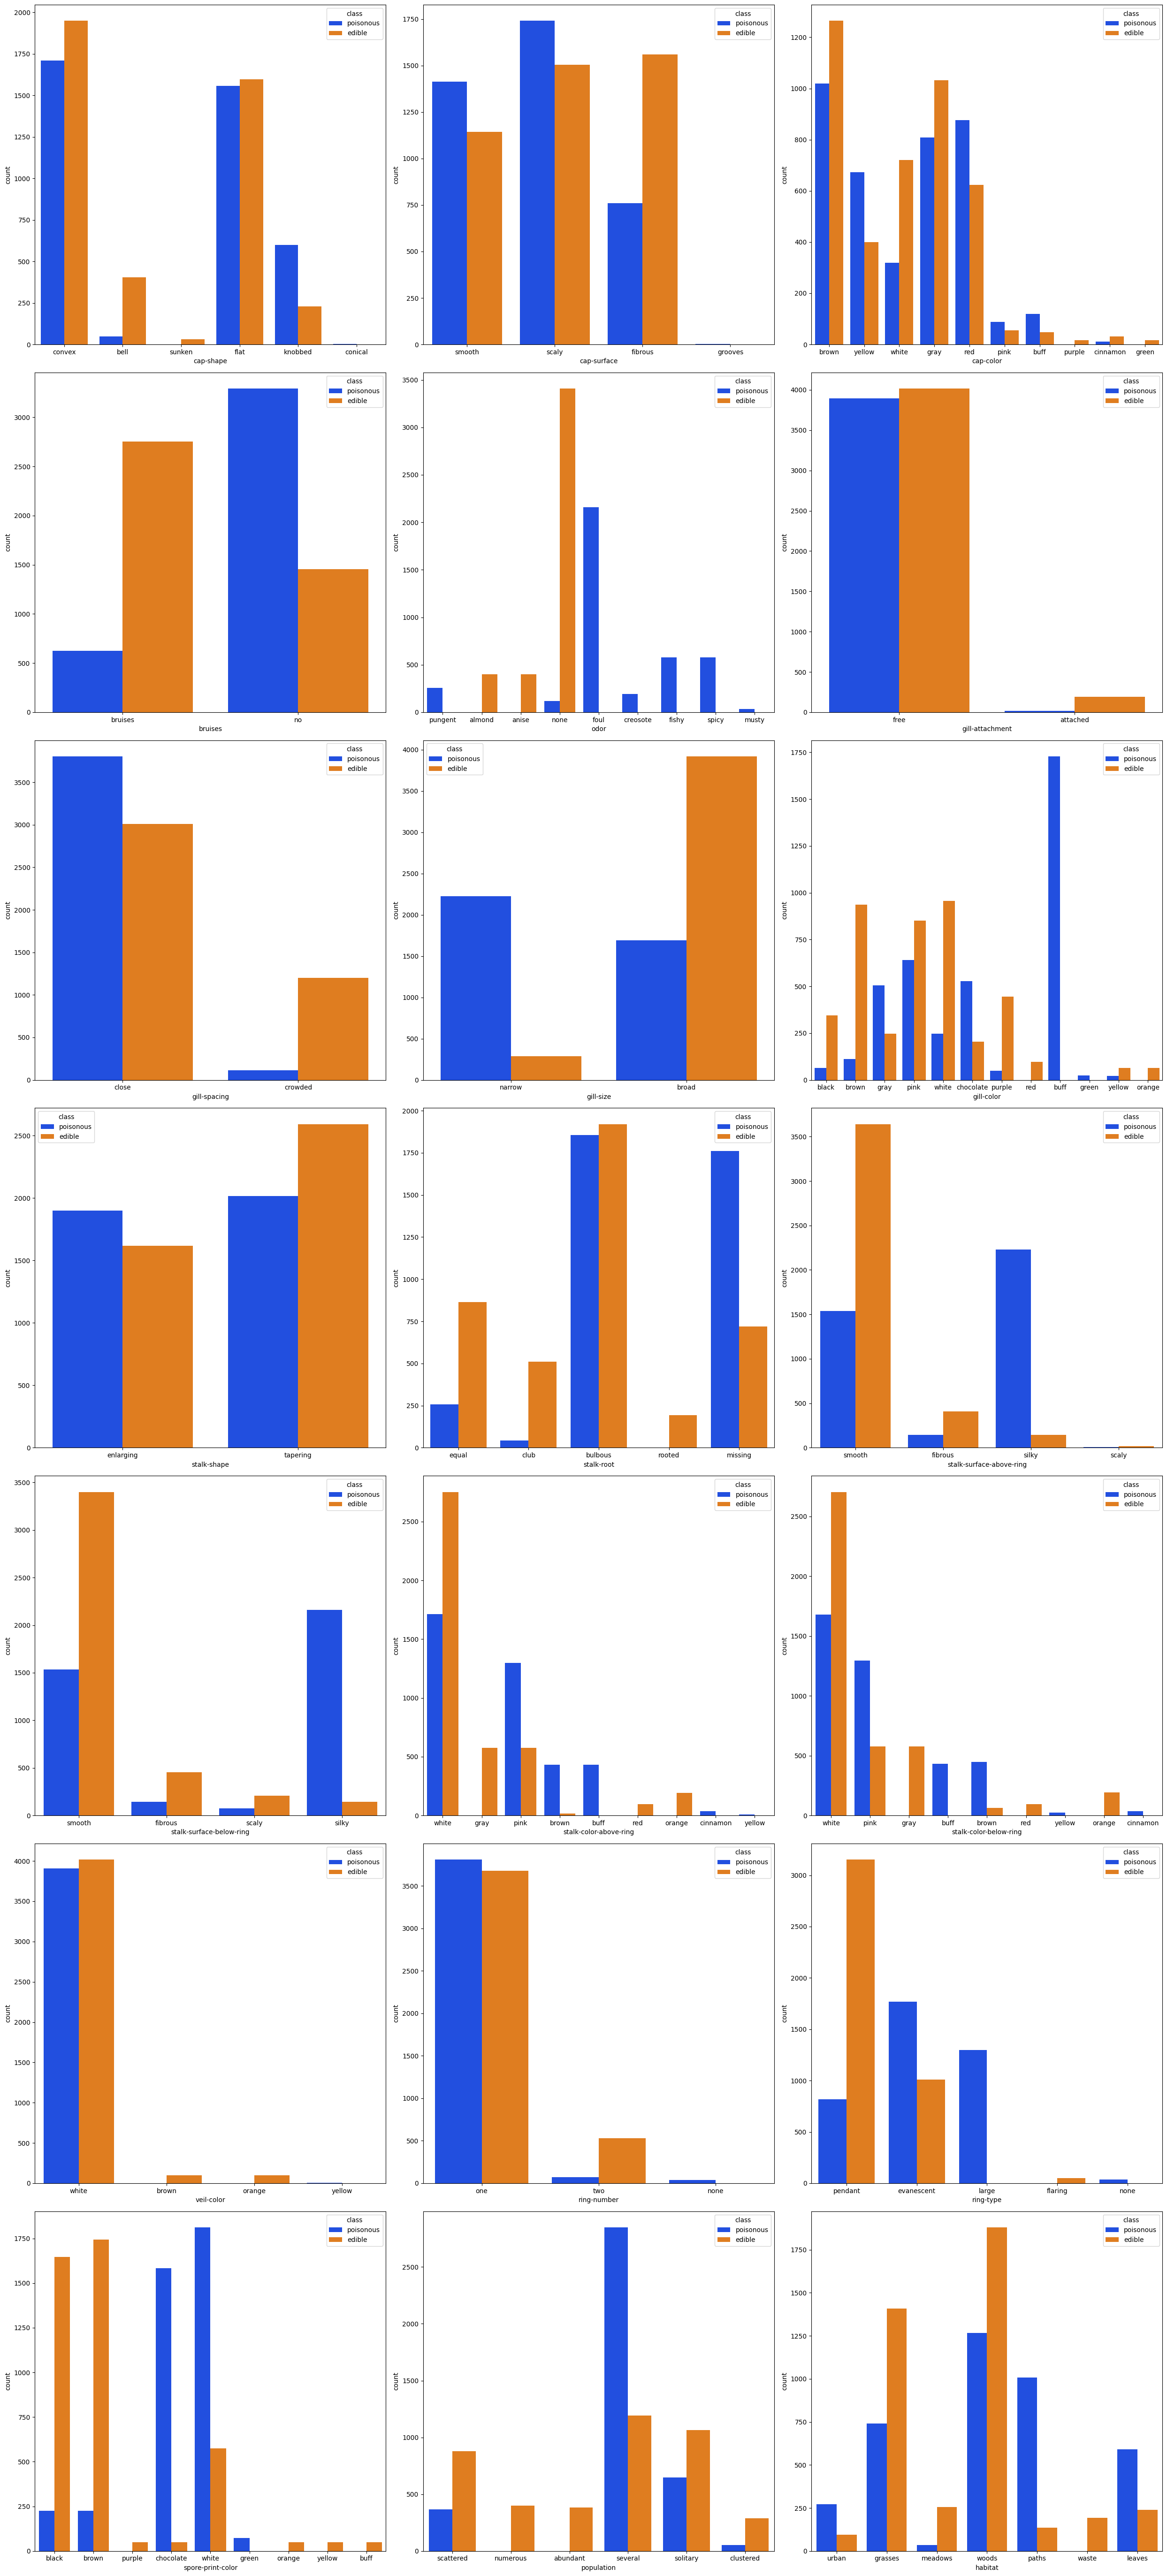

In [35]:
features = data.drop('class', axis=1).columns

plt.figure(figsize=(25,55))
for i in enumerate(features):
    plt.subplot(7,3, i[0]+1)
    sns.countplot(x=i[1], hue='class', data=data, palette='bright')

plt.tight_layout()
plt.show()

# Model training

In [17]:
# separate dependent and independent features
feature = data.iloc[:,1:]
target = data.iloc[:, 0]

# train test split
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape

((6499, 21), (1625, 21))

In [19]:
# ordinal encoding

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

y_train = y_train.map({'edible':0,'poisonous':1})
y_test = y_test.map({'edible':0,'poisonous':1})

In [20]:
X_train_encoded

array([[4., 3., 7., ..., 7., 4., 6.],
       [2., 3., 0., ..., 7., 4., 3.],
       [3., 2., 7., ..., 7., 4., 1.],
       ...,
       [3., 2., 0., ..., 1., 5., 3.],
       [4., 3., 7., ..., 7., 4., 3.],
       [4., 0., 3., ..., 7., 2., 0.]], shape=(6499, 21))

In [21]:
# models to train
models = {
    'Logistic Reg' : LogisticRegression(max_iter=300, random_state=42),
    'Decision Tree' : DecisionTreeClassifier(random_state=42),
    'Random For' : RandomForestClassifier(random_state=42),
    'SVC' : SVC(random_state=42),
    'KNN' : KNeighborsClassifier(n_neighbors=7)   
}

In [22]:
# initializing a dictionary to store results
result = {}
for name, classifier in models.items():
    classifier.fit(X_train_encoded, y_train)
    y_pred = classifier.predict(X_test_encoded)
    accuracy = accuracy_score(y_test,y_pred)*100
    result[name] = accuracy
    
result = list(result.items())
result_df = pd.DataFrame(result, columns=['Model','Accuracy'])

In [23]:
result_df

,Model,Accuracy
0,Logistic Reg,95.938462
1,Decision Tree,100.000000
2,Random For,100.000000
3,SVC,99.938462
4,KNN,100.000000


- Decision Tree, Random Forest, and KNN each achieved 100 percent accuracy.
- So, we are selecting Random Forest as our final model. 

In [25]:
# random forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_encoded, y_train)
pred = model.predict(X_test_encoded)

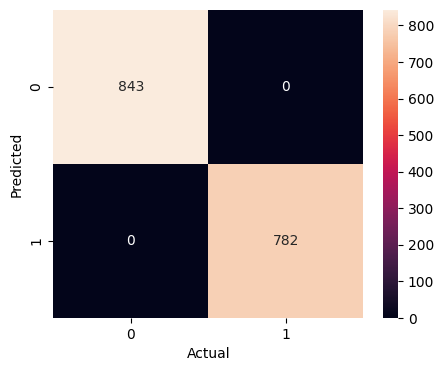

In [27]:
# confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True,fmt='.0f')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

In [38]:
# save the model
with open('model/random_for.pkl', 'wb') as f:
    pickle.dump(model, f)